In [1]:
import pandas as pd
from glob import glob
import os

# read all files in the folder

current_folder = 'dataset'
all_files = glob(current_folder + "/*.xls")

# load dataset from folder dataset which are xls files
if all_files:
	dataset = pd.concat([pd.read_excel(file, header=3) for file in all_files])
	# show header title
	print(dataset.columns)
else:
	print("No files found in the folder.")

Index(['DateTime', 'Most recent forecast [MW]', 'Day-Ahead forecast [MW]',
       'Week-Ahead forecast [MW]', 'Real-time Upscaled Measurement [MW]',
       'Corrected Upscaled Measurement [MW]', 'Monitored Capacity [MWp]',
       'Day-Ahead forecast (11h00) [MW]'],
      dtype='object')


In [2]:
# Delete the first 3 columns
dataset = dataset.drop(dataset.columns[[0, 1, 2]], axis=1)

# show the first 5 rows of the dataset
print(dataset.head())

   Week-Ahead forecast [MW]  Real-time Upscaled Measurement [MW]  \
0                       NaN                                  0.0   
1                       NaN                                  0.0   
2                       NaN                                  0.0   
3                       NaN                                  0.0   
4                       NaN                                  0.0   

   Corrected Upscaled Measurement [MW]  Monitored Capacity [MWp]  \
0                                  0.0                    400.02   
1                                  0.0                    400.02   
2                                  0.0                    400.02   
3                                  0.0                    400.02   
4                                  0.0                    400.02   

   Day-Ahead forecast (11h00) [MW]  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0

In [3]:
import pandas as pd
import os

# Initialize an empty list to store dataframes
dataframes = []
save_path = os.path.join(os.getcwd(), 'dataset_merge')

power_columns = ["Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                      "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]

# Iterate over each file in the dataset folder
for file in os.listdir(current_folder):
    if file.endswith('.xls'):
        file_path = os.path.join(current_folder, file)
        
        # Load the Excel file
        df = pd.read_excel(file_path)
        
        # Rename columns for easier access
        df.columns = ["DateTime", "Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                      "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]
        
        # Drop the first three rows which contain metadata
        df = df.iloc[3:].reset_index(drop=True)
        
        # Convert DateTime column to actual datetime format
        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%d/%m/%Y %H:%M", errors='coerce')
        
        # Convert power columns to numeric values
        df[power_columns] = df[power_columns].apply(pd.to_numeric, errors="coerce")
        
        # Append the cleaned dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dataframes, ignore_index=True)

# Ensure the save path directory exists
os.makedirs(save_path, exist_ok=True)

# Save the merged dataframe to a new Excel file
merged_df.to_excel(os.path.join(save_path, 'dataset_merge.xlsx'), index=False)
# save to pandas object
merged_df.to_pickle(os.path.join(save_path, 'dataset_merge.pkl'))

# Display the merged dataframe
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Merged Solar Power Output Data", dataframe=merged_df)

Merged Solar Power Output Data


In [4]:
import pandas as pd
import os

# Initialize an empty list to store dataframes
dataframes = []
save_path = os.path.join(os.getcwd(), 'dataset_merge')

power_columns = ["Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                 "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]

# Define the time range and year range
time_range = (8, 17)
year_range = (2013, 2017)

# Iterate over each file in the dataset folder
for file in os.listdir(current_folder):
    if file.endswith('.xls'):
        file_path = os.path.join(current_folder, file)
        
        # Load the Excel file
        df = pd.read_excel(file_path)
        
        # Rename columns for easier access
        df.columns = ["DateTime", "Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                      "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]
        
        # Drop the first three rows which contain metadata
        df = df.iloc[3:].reset_index(drop=True)
        
        # Convert DateTime column to actual datetime format
        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%d/%m/%Y %H:%M", errors='coerce')
        
        # Convert power columns to numeric values
        df[power_columns] = df[power_columns].apply(pd.to_numeric, errors="coerce")
        
        # Filter data within the time range and year range
        df = df[(df["DateTime"].dt.hour >= time_range[0]) & (df["DateTime"].dt.hour <= time_range[1])]
        df = df[(df["DateTime"].dt.year >= year_range[0]) & (df["DateTime"].dt.year <= year_range[1])]
        
        # Append the cleaned dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dataframes, ignore_index=True)

# Ensure the save path directory exists
os.makedirs(save_path, exist_ok=True)

# Save the merged dataframe to a new Excel file
merged_df.to_excel(os.path.join(save_path, 'dataset_merge.xlsx'), index=False)

# Save to pandas object
merged_df.to_pickle(os.path.join(save_path, 'dataset_merge.pkl'))

# Display the merged dataframe
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Merged Solar Power Output Data", dataframe=merged_df)


Merged Solar Power Output Data


In [5]:
import pandas as pd

# Ensure 'DateTime' column is in datetime format
merged_df["DateTime"] = pd.to_datetime(merged_df["DateTime"], errors="coerce")

# Define the range of years (2012 to 2024)
years = list(range(2012, 2025))

# Create an empty list to store yearly results
yearly_stats = []

# Loop through each year and calculate min, max, avg, total, and std deviation
for year in years:
    df_year = merged_df[merged_df["DateTime"].dt.year == year]
    
    if not df_year.empty and "Real_Time_Measurement_MW" in df_year.columns:
        yearly_stats.append({
            "Year": year,
            "Minimum Power (MW)": df_year["Real_Time_Measurement_MW"].min(),
            "Maximum Power (MW)": df_year["Real_Time_Measurement_MW"].max(),
            "Average Power (MW)": df_year["Real_Time_Measurement_MW"].mean(),
            "Total Power (MW)": df_year["Real_Time_Measurement_MW"].sum(),
            "Standard Deviation (MW)": df_year["Real_Time_Measurement_MW"].std(),  # Added Standard Deviation
        })
    else:
        print(f"No data available for {year} or column missing.")

# Convert results to a DataFrame
yearly_stats_df = pd.DataFrame(yearly_stats)

# Display the results in an interactive table
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Yearly_Power_Stats", dataframe=yearly_stats_df)

# Optionally, save results to an Excel file
yearly_stats_df.to_excel("Yearly_Power_Stats.xlsx", index=False)
print("Yearly power statistics saved to Yearly_Power_Stats.xlsx")


No data available for 2012 or column missing.
No data available for 2018 or column missing.
No data available for 2019 or column missing.
No data available for 2020 or column missing.
No data available for 2021 or column missing.
No data available for 2022 or column missing.
No data available for 2023 or column missing.
No data available for 2024 or column missing.
Yearly_Power_Stats


Yearly power statistics saved to Yearly_Power_Stats.xlsx


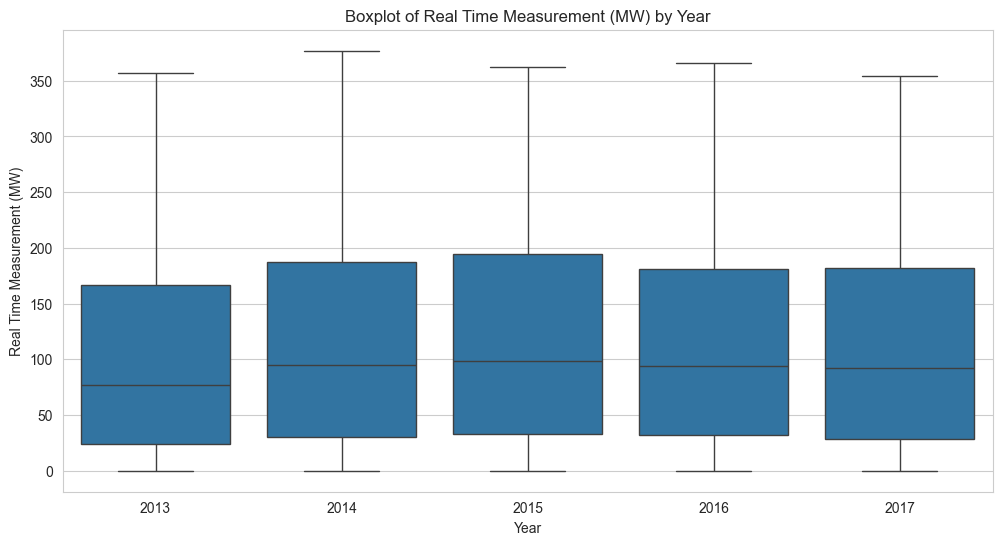

In [6]:
# plot boxplot for each year
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for each year
plt.figure(figsize=(12, 6))
# style of the plot
sns.set_style("whitegrid")
# boxplot
sns.boxplot(x=merged_df["DateTime"].dt.year, y=merged_df["Real_Time_Measurement_MW"])
# title
plt.title("Boxplot of Real Time Measurement (MW) by Year")
# x-axis label
plt.xlabel("Year")
# y-axis label
plt.ylabel("Real Time Measurement (MW)")
# show plot
plt.show()


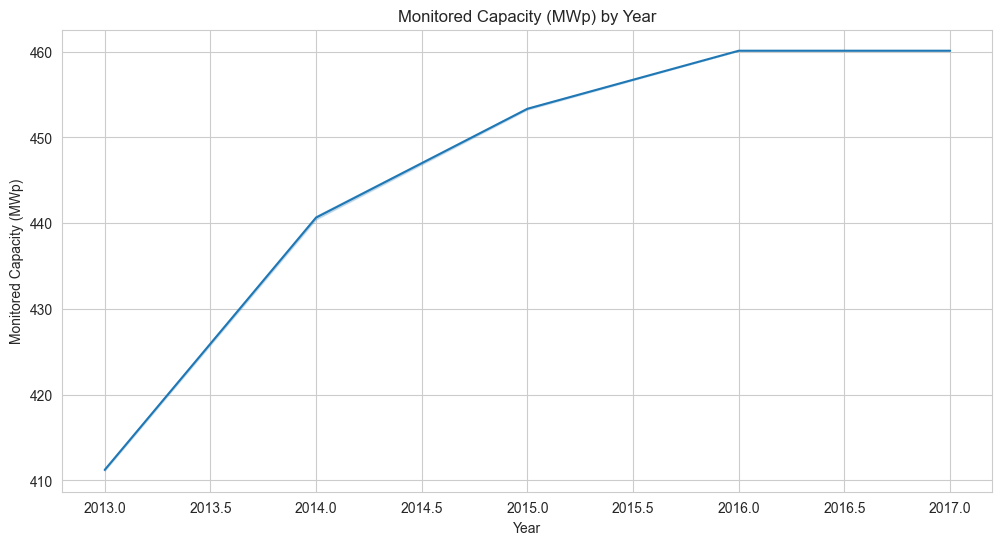

In [7]:
# plot Monitored Capacity [MWp] by year 
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot for Monitored Capacity [MWp] by year
plt.figure(figsize=(12, 6))
# style of the plot
sns.set_style("whitegrid")
# lineplot
sns.lineplot(x=merged_df["DateTime"].dt.year, y=merged_df["Monitored_Capacity_MWp"])
# title
plt.title("Monitored Capacity (MWp) by Year")
# x-axis label
plt.xlabel("Year")
# y-axis label
plt.ylabel("Monitored Capacity (MWp)")
# show plot
plt.show()

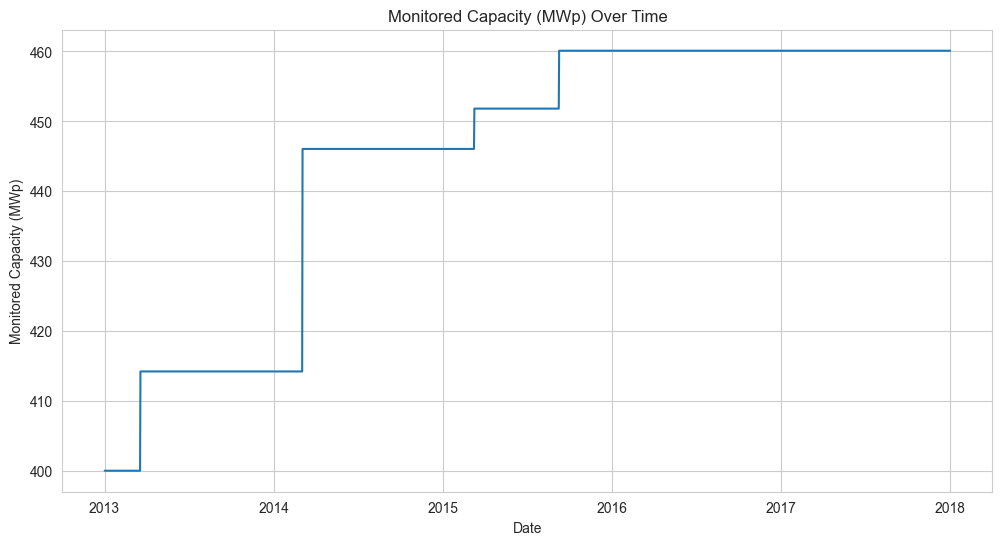

In [8]:
# plot trend monitored capacity by year 

import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot for Monitored Capacity [MWp] by year
plt.figure(figsize=(12, 6))
# style of the plot
sns.set_style("whitegrid")
# lineplot
sns.lineplot(x=merged_df["DateTime"], y=merged_df["Monitored_Capacity_MWp"])
# title
plt.title("Monitored Capacity (MWp) Over Time")
# x-axis label
plt.xlabel("Date")
# y-axis label
plt.ylabel("Monitored Capacity (MWp)")
# show plot
plt.show()

In [9]:
import pandas as pd
import os

# Initialize an empty list to store dataframes
dataframes = []
save_path = os.path.join(os.getcwd(), 'dataset_merge')

power_columns = ["Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                      "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]

# Iterate over each file in the dataset folder
for file in os.listdir(current_folder):
    if file.endswith('.xls'):
        file_path = os.path.join(current_folder, file)
        
        # Load the Excel file
        df = pd.read_excel(file_path)
        
        # Rename columns for easier access
        df.columns = ["DateTime", "Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                      "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]
        
        # Drop the first three rows which contain metadata
        df = df.iloc[3:].reset_index(drop=True)
        
        # Convert DateTime column to actual datetime format
        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%d/%m/%Y %H:%M", errors='coerce')
        
        # Convert power columns to numeric values
        df[power_columns] = df[power_columns].apply(pd.to_numeric, errors="coerce")
        
        # Append the cleaned dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dataframes, ignore_index=True)

# Ensure the save path directory exists
os.makedirs(save_path, exist_ok=True)

# Save the merged dataframe to a new Excel file
merged_df.to_excel(os.path.join(save_path, 'dataset_merge.xlsx'), index=False)
# save to pandas object
merged_df.to_pickle(os.path.join(save_path, 'dataset_merge.pkl'))

# Display the merged dataframe
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Merged Solar Power Output Data", dataframe=merged_df)

Merged Solar Power Output Data


In [10]:
import pandas as pd
import os

# Initialize an empty list to store dataframes
dataframes = []
save_path = os.path.join(os.getcwd(), 'dataset_merge')

power_columns = ["Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                 "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]

# Define the time range and year range
time_range = (8, 17)
year_range = (2013, 2017)

# Iterate over each file in the dataset folder
for file in os.listdir(current_folder):
    if file.endswith('.xls'):
        file_path = os.path.join(current_folder, file)
        
        # Load the Excel file
        df = pd.read_excel(file_path)
        
        # Rename columns for easier access
        df.columns = ["DateTime", "Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                      "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]
        
        # Drop the first three rows which contain metadata
        df = df.iloc[3:].reset_index(drop=True)
        
        # Convert DateTime column to actual datetime format
        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%d/%m/%Y %H:%M", errors='coerce')
        
        # Convert power columns to numeric values
        df[power_columns] = df[power_columns].apply(pd.to_numeric, errors="coerce")
        
        # Filter data within the time range and year range
        df = df[(df["DateTime"].dt.hour >= time_range[0]) & (df["DateTime"].dt.hour <= time_range[1])]
        df = df[(df["DateTime"].dt.year >= year_range[0]) & (df["DateTime"].dt.year <= year_range[1])]
        
        # Calculate standard deviation for power columns
        df["Power_Std_Dev"] = df[power_columns].std(axis=1)
        
        # Append the cleaned dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dataframes, ignore_index=True)

# Ensure the save path directory exists
os.makedirs(save_path, exist_ok=True)

# Save the merged dataframe to a new Excel file
merged_df.to_excel(os.path.join(save_path, 'dataset_merge.xlsx'), index=False)

# Save to pandas object
merged_df.to_pickle(os.path.join(save_path, 'dataset_merge.pkl'))

# Display the merged dataframe
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Merged Solar Power Output Data", dataframe=merged_df)


Merged Solar Power Output Data


In [11]:
import pandas as pd
import os

# Initialize an empty list to store dataframes
dataframes = []
save_path = os.path.join(os.getcwd(), 'dataset_merge')

power_columns = ["Real_Time_Measurement_MW", "Monitored_Capacity_MWp"]

# Define the time range and year range
time_range = (8, 17)
year_range = (2013, 2017)

# Iterate over each file in the dataset folder
for file in os.listdir(current_folder):
    if file.endswith('.xls'):
        file_path = os.path.join(current_folder, file)
        
        # Load the Excel file
        df = pd.read_excel(file_path)
        
        # Rename columns for easier access
        df.columns = ["DateTime", "Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                      "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]
        
        # Drop the first three rows which contain metadata
        df = df.iloc[3:].reset_index(drop=True)
        
        # Convert DateTime column to actual datetime format
        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%d/%m/%Y %H:%M", errors='coerce')
        
        # Convert power columns to numeric values
        df[power_columns] = df[power_columns].apply(pd.to_numeric, errors="coerce")
        
        # Filter data within the time range and year range
        df = df[(df["DateTime"].dt.hour >= time_range[0]) & (df["DateTime"].dt.hour <= time_range[1])]
        df = df[(df["DateTime"].dt.year >= year_range[0]) & (df["DateTime"].dt.year <= year_range[1])]
        
        # Calculate standard deviation, min, and max for power columns
        df["Power_Std_Dev"] = df[power_columns].std(axis=1)
        df["Power_Min"] = df[power_columns].min(axis=1)
        df["Power_Max"] = df[power_columns].max(axis=1)
        
        # Select relevant columns
        df = df[["DateTime", "Real_Time_Measurement_MW", "Monitored_Capacity_MWp", "Power_Std_Dev", "Power_Min", "Power_Max"]]
        
        # Append the cleaned dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dataframes, ignore_index=True)

# Ensure the save path directory exists
os.makedirs(save_path, exist_ok=True)

# Save the merged dataframe to a new Excel file
merged_df.to_excel(os.path.join(save_path, 'dataset_merge.xlsx'), index=False)

# Save to pandas object
merged_df.to_pickle(os.path.join(save_path, 'dataset_merge.pkl'))

# Display the merged dataframe
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Merged Solar Power Output Data", dataframe=merged_df)


Merged Solar Power Output Data


In [12]:
# save to csv
# Save the merged dataframe to a new CSV file
merged_df.to_csv(os.path.join(save_path, 'dataset_selected.csv'), index=False)